In [2]:
import pandas as pd
import numpy as np
import requests as rq

In [3]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv'
res=rq.get(url)
with open('cell_samples.csv','wb')as f:
    f.write(res.content)

In [4]:
df=pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

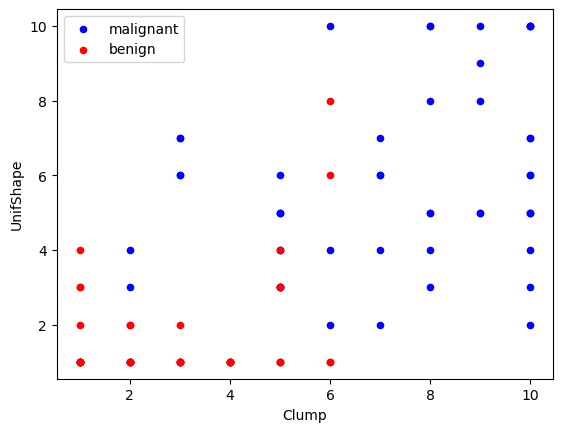

In [9]:
import matplotlib.pyplot as plt
ax=df[df['Class']==4][0:50].plot(kind='scatter',x='Clump',y='UnifShape',color='b',label='malignant')
df[df['Class']==2][0:50].plot(kind='scatter',x='Clump',y='UnifShape',color='r',ax=ax,label='benign')
plt.show()

In [12]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [19]:
df=df[df['BareNuc']!='?']
df['BareNuc']=df['BareNuc'].astype(int)
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [20]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [21]:
x=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit']].values
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [23]:
y=df['Class'].values
y[0:5]

array([2, 2, 2, 2, 2])

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print(x_train.shape,' ',y_train.shape)
print(x_test.shape,' ',y_test.shape)

(546, 9)   (546,)
(137, 9)   (137,)


In [27]:
from sklearn import svm
cft=svm.SVC(kernel='rbf')
cft.fit(x_train,y_train)
yhat=cft.predict(x_test)
print(yhat[0:5])
print(y_test[0:5])

[2 4 2 4 2]
[2 4 2 4 2]


In [28]:
from sklearn import metrics
from sklearn.metrics import jaccard_score, f1_score ,r2_score

In [29]:
print(metrics.accuracy_score(y_test,yhat))

0.9635036496350365


In [33]:
f1_score(y_test,yhat,average='weighted')

0.9639038982104676

In [36]:
jaccard_score(y_test,yhat,pos_label=2)

0.9444444444444444